In [7]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
sns.set_palette('deep', desat=.6)
sns.set_context(rc={'figure.figsize': (8, 5) } )

Populating the interactive namespace from numpy and matplotlib


In [8]:
df=pd.read_csv("data/kddcup_data_10_percent.txt")



In [9]:
vectorize_map={}
select_feature=[2, 3 ,4 ,7  ,12 ,14 ,15 ,21 ,22]
for i in select_feature:
    select_key=df.columns[i-1]
    tcp_dict=dict(enumerate(np.unique(df[select_key])))
    vectorize_map[i]=dict((v,k) for k,v in tcp_dict.iteritems())

# for i in  select_feature:
#     print vectorize_map[i]

{'udp': 2, 'icmp': 0, 'tcp': 1}
{'domain': 10, 'netbios_ssn': 35, 'telnet': 56, 'Z39_50': 2, 'smtp': 50, 'gopher': 20, 'private': 45, 'echo': 12, 'shell': 49, 'red_i': 46, 'eco_i': 13, 'sunrpc': 53, 'ftp_data': 19, 'urh_i': 60, 'pm_dump': 41, 'pop_3': 43, 'pop_2': 42, 'systat': 55, 'ftp': 18, 'sql_net': 51, 'whois': 65, 'netbios_dgm': 33, 'efs': 15, 'remote_job': 47, 'daytime': 8, 'ntp_u': 39, 'uucp': 62, 'finger': 17, 'ldap': 28, 'netbios_ns': 34, 'kshell': 27, 'iso_tsap': 25, 'ecr_i': 14, 'nntp': 38, 'printer': 44, 'domain_u': 11, 'uucp_path': 63, 'courier': 5, 'exec': 16, 'time': 59, 'netstat': 36, 'auth': 3, 'rje': 48, 'hostnames': 21, 'link': 29, 'ssh': 52, 'http_443': 23, 'csnet_ns': 6, 'X11': 1, 'IRC': 0, 'tftp_u': 57, 'login': 30, 'supdup': 54, 'name': 32, 'nnsp': 37, 'mtp': 31, 'http': 22, 'bgp': 4, 'ctf': 7, 'klogin': 26, 'vmnet': 64, 'tim_i': 58, 'discard': 9, 'imap4': 24, 'other': 40, 'urp_i': 61}
{'OTH': 0, 'RSTR': 4, 'S3': 8, 'S2': 7, 'S1': 6, 'S0': 5, 'RSTOS0': 3, 'REJ':

In [10]:
def normal_or_not(text):
    if text=="normal.":
        return 1
    else:
        return 0
    
washed_df=pd.DataFrame()    

washed_df[0]=df['normal.'].map(normal_or_not)
for i in select_feature:
    key=df.columns[i-1]
#     print key
    washed_df[i]=df[key].map(vectorize_map[i])
    

In [11]:
print len(washed_df.loc[washed_df[0]==1])
print len (washed_df)
print len(washed_df.loc[washed_df[0]==1])/ float(len (washed_df))

97277
494020
0.196909032023


In [12]:
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
forest = RandomForestClassifier(n_estimators=10)
ada=AdaBoostClassifier()
gdbt=GradientBoostingClassifier()

train_data = washed_df.values
forest = forest.fit(train_data[0::,1::],train_data[0::,0] )



# from sklearn import cross_validation
# forest_scores = cross_validation.cross_val_score(forest,train_data[0::,1::], train_data[0::,0],cv=5)


# ada_scores = cross_validation.cross_val_score(ada,train_data[0::,1::], train_data[0::,0],cv=5)

# gdbt_scores = cross_validation.cross_val_score(gdbt,train_data[0::,1::], train_data[0::,0],cv=5)
 




In [ ]:
# print forest_scores.mean()
# print ada_scores.mean()
# print gdbt_scores.mean()   

0.986248939905


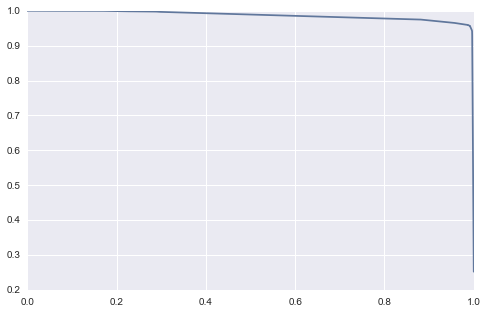

In [13]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
y_true = train_data[0::,0]
y_scores = forest.predict_proba(train_data[0::,1::])

precision, recall, thresholds = precision_recall_curve(y_true, y_scores[0::,1])


plt.plot( recall,precision)
print metrics.auc(recall,precision)

0.99605060404
0.989401238816


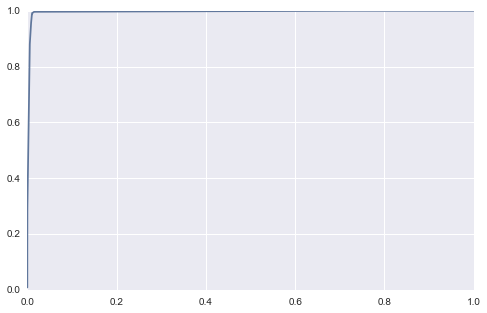

In [16]:
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_scores[0::,1])
plt.plot( fpr, tpr)
print metrics.auc(fpr, tpr)
print forest.score(train_data[0::,1::],y_true)